# TP - Técnicas de Clasificación

**a) Definir cuál es el objetivo de aplicar técnicas de clasificación (sobre el dataset elegido).**

> El objetivo de aplicar técnicas de clasificación en el dataset elegido es poder reconocer correos electrónicos no de deseados en base a 58 caracteristicas evaluadas en 4600 instancias.


Cargamos la librería que nos permite acceder al dataset

In [ ]:
# soporte para cargar dataset de https://www.openml.org/
!pip install openml
import openml

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 119 kB 7.8 MB/s 
     |████████████████████████████████| 76 kB 3.7 MB/s 
  Created wheel for openml: filename=openml-0.12.2-py3-none-any.whl size=137326 sha256=5715cab94c7dafc7228f1cb0fa210c275c5aeeb2f7dda7b9444ea42816d9731e
  Stored in directory: /root/.cache/pip/wheels/6a/20/88/cf4ac86aa18e2cd647ed16ebe274a5dacee9d0075fa02af250
  Created wheel for liac-arff: filename=liac_arff-2.5.0-py3-none-any.whl size=11732 sha256=6614c2cd01739e8a4fa5948bf4ba444363026b48b97cfa60b0f0f1ada340011d
  Stored in directory: /root/.cache/pip/wheels/1f/0f/15/332ca86cbebf25ddf98518caaf887945fbe1712b97a0f2493b
Successfully built openml liac-arff


Accedemos al dataset

In [ ]:
import pandas as pd

# Seleccionamos el dataset Spambase de OPENML
dataset = openml.datasets.get_dataset(44)   #Detaset Spambase

# separamos las información almacenada en el dataset
X, y, categorical_indicator, attribute_names = dataset.get_data(
    dataset_format='dataframe',
    target=dataset.default_target_attribute
)

#  concatenamos la información relevante en un único DataFrame 
df = pd.concat([X, y], axis=1)
df

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


**Información de atributos:**
La última columna indica si el correo electrónico se consideró spam (1) o no (0), es decir, correo electrónico comercial no solicitado. La mayoría de los atributos indican si una palabra o carácter en particular aparecía con frecuencia en el correo electrónico. Los atributos de longitud de ejecución (55-57) miden la longitud de secuencias de letras mayúsculas consecutivas.

**b) En caso de ser necesario, definir qué pre‐procesamiento se realizará a los datos. Justificar.**

>En este caso no fue necesario aplicar pre-procesamiento debido a que los atributos estan normalizados y no existen datos faltantes en el dataset.



**d) Obtener dos clasificadores utilizando la librería Scikit learn. Para ello elegir 2 técnicas de clasificación, configurar los clasificadores, detallar de qué forma se evaluarán los clasificadores (hold-out / cross-validation), ejecutar los algoritmos. Justificar las decisiones tomadas.**

> Para obtener los clasificadores utlizaremos la técnica de Arbol de Decisión y la técnica de Naive-Bayes.

> En primera instancia los clasificadores se evaluaran con la técnica de Hold-out realizando una partición del dataset tomando 70% para training y 30% para testing.

> En segunda instancia se evaluaran con la técnica de Cross Validation con un valor de cv=10, lo que indica que los datos seran separados en 10 folds, analizando las métricas precision_macro y recall_macro. 


**e) Evaluar los dos clasificadores y compararlos, indicando cual de los dos recomendaría.**



#Hold-out

In [ ]:
from sklearn.model_selection import train_test_split

# Realiza el split del dataset en training (70%) y testing (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
# Conjunto de entrenamiento
X_train


#################### Árbol de Desición ########################
from sklearn import tree

# Entrena el clasificador 
clf_dtc = tree.DecisionTreeClassifier()
clf_dtc.fit(X_train, y_train)

# Evalua el clasificador
print("Árbol de Desición:", clf_dtc.score(X_test, y_test))  #Llama al predict con X_test y cmpara el resultado con y_test



####################### Naive-Bayes ###########################
from sklearn.naive_bayes import GaussianNB

# Entrena el clasificador
clf_bayes = GaussianNB()
clf_bayes.fit(X_train, y_train)

# Evalua el clasificador
print("Naive-Bayes:", clf_bayes.score(X_test, y_test))  #Llama al predict con X_test y cmpara el resultado con y_test




Árbol de Desición: 0.9160028964518465
Naive-Bayes: 0.8066618392469225


#Cross Validation

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score


#################### Árbol de Desición ########################
print ("\n  Árbol de Desición  ")
clf_dtc = tree.DecisionTreeClassifier()

scoring = ['precision_macro', 'recall_macro']   #Las macro no tienen en cuenta el desbalanceo de clases
scores = cross_validate(clf_dtc, X, y, scoring=scoring, cv=10)

print("presicion_macro: ", scores['test_precision_macro'].mean())
print("recall_macro: ", scores['test_recall_macro'].mean())
print("Accuracy: %0.2f (+/- %0.2f)" % (scores['test_precision_macro'].mean(), scores['test_recall_macro'].std()))


####################### Naive-Bayes ###########################
print ("\n  Naive-Bayes  ")
clf_bayes = GaussianNB()

scoring = ['precision_macro', 'recall_macro']   #Las macro no tienen en cuenta el desbalanceo de clases
scores = cross_validate(clf_bayes, X, y, scoring=scoring, cv=10)

print("presicion_macro: ", scores['test_precision_macro'].mean())
print("recall_macro: ", scores['test_recall_macro'].mean())
print("Accuracy: %0.2f (+/- %0.2f)" % (scores['test_precision_macro'].mean(), scores['test_recall_macro'].std()))




  Árbol de Desición  
presicion_macro:  0.8980494312906465
recall_macro:  0.8964733341205751
Accuracy: 0.90 (+/- 0.04)

  Naive-Bayes  
presicion_macro:  0.8355405680394657
recall_macro:  0.8454293399090297
Accuracy: 0.84 (+/- 0.07)


>La precisión y el recall evaluan la clasificación sobre la clase positiva.

>La precisión indica cuantos correos clasificados como spam, realmente lo eran. Por otro lado, el recall indica cuantos correos del total de correos spam fueron identificados.

Ahora evaluaremos las métricas utilizando predicciones con Cross Validation.


In [ ]:
from sklearn.model_selection import cross_val_predict

print(y)
#################### Árbol de Desición ########################
print ("\n  Árbol de Desición  ")
cross_val_predictions_dtc = cross_val_predict(clf_dtc, X, y, cv=10)
print(cross_val_predictions_dtc)

####################### Naive-Bayes ###########################
print ("\n  Naive-Bayes  ")
cross_val_predictions_bayes = cross_val_predict(clf_bayes, X, y, cv=10)
print(cross_val_predictions_bayes)


0       1
1       1
2       1
3       1
4       1
       ..
4596    0
4597    0
4598    0
4599    0
4600    0
Name: class, Length: 4601, dtype: category
Categories (2, object): ['0' < '1']

  Árbol de Desición  
['1' '1' '1' ... '0' '0' '0']

  Naive-Bayes  
['1' '1' '1' ... '0' '1' '0']


>Esta evaluación no retorna las métricas computadas, sino que retorna predicciones de todo el conjunto de instancias con las que se evalua el modelo. 

Reporte por clases en base a las predicciones generadas

In [ ]:
from sklearn.metrics import classification_report

#################### Árbol de Desición ########################
print ("\n  Árbol de Desición  ")
print(classification_report(y, cross_val_predictions_dtc, target_names=["No_Spam", "Spam"]))


####################### Naive-Bayes ###########################
print ("\n  Naive-Bayes  ")
print(classification_report(y, cross_val_predictions_bayes, target_names=["No_Spam", "Spam"]))



  Árbol de Desición  
              precision    recall  f1-score   support

     No_Spam       0.92      0.91      0.92      2788
        Spam       0.87      0.88      0.87      1813

    accuracy                           0.90      4601
   macro avg       0.89      0.90      0.89      4601
weighted avg       0.90      0.90      0.90      4601


  Naive-Bayes  
              precision    recall  f1-score   support

     No_Spam       0.96      0.73      0.83      2788
        Spam       0.70      0.96      0.81      1813

    accuracy                           0.82      4601
   macro avg       0.83      0.85      0.82      4601
weighted avg       0.86      0.82      0.82      4601



Es difícil comparar dos clasificadores usando dos medidas separadas. Para poder compararlos mejor, debemos observar la métrica F1-Score, que combina la presición y el recall en una métrica. Por lo tanto, F1-score es alto cuando la presición y el recall también lo son.

#Visualización de resultados
Matriz de confusión utilizando ConfusionMatrixDisplay

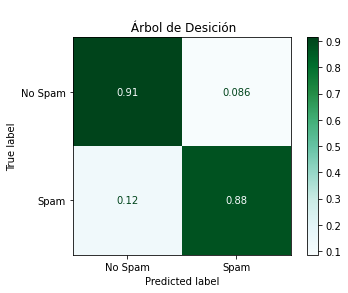

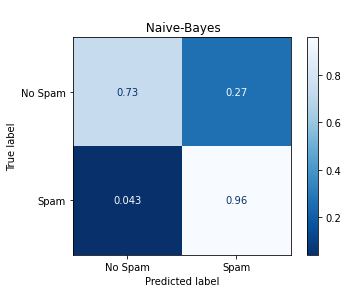

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay  # Permite visualizar la matriz de confusión
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

conf_mat_dtc = confusion_matrix(y, cross_val_predictions_dtc, normalize='true') #normalize='true', 'pred', 'all'
conf_mat_bayes = confusion_matrix(y, cross_val_predictions_bayes, normalize='true') #normalize='true', 'pred', 'all'


#################### Árbol de Desición ########################
disp_dtc = ConfusionMatrixDisplay(confusion_matrix=conf_mat_dtc, display_labels=["No Spam","Spam"])
disp_dtc.plot(cmap=plt.cm.BuGn)
disp_dtc.ax_.set_title("\n Árbol de Desición")

####################### Naive-Bayes ###########################
disp_bayes = ConfusionMatrixDisplay(confusion_matrix=conf_mat_bayes, display_labels=["No Spam","Spam"])
disp_bayes.plot(cmap=plt.cm.Blues_r)
disp_bayes.ax_.set_title("\n Naive-Bayes")

plt.show()

# Modelo final

Analizando las métricas obtenidas anteriormente para cada modelo, podemos ver que los datos arrojados por el modelo de árbol representan la mejor solución obtenida para nuestro problema. Por lo tanto, seleccionaremos dicho modelo para construir el modelo final.


In [ ]:
clf_dtc.fit(X,y)

DecisionTreeClassifier()

**f) Explicar un ejemplo de cómo los clasificadores obtenidos pueden ser usados en el
futuro.**

> Debido a que los correos electrónicos no deseados pueden robar datos personales, los clasificadores obtenidos podrian ser utilizados para identificar dichos correos y asi evitar fraudes o estafas. 